In [56]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load Dataset
df = pd.read_csv(r"C:\Users\USER\Chameleon AI-IoT\MOP-Code\artificial-intelligence\CyberSecurity\datasets\HITECH_Cleaned.csv")
df.head()

,name_of_covered_entity,state,covered_entity_type,individuals_affected,breach_submission_date,type_of_breach,location_of_breached_information,business_associate_present,web_description,breach_year,breach_month,severity_level,type_of_breach_encoded,location_of_breached_information_encoded,covered_entity_type_encoded
0,William F Rinehart DMD PA,SC,Healthcare Provider,25000.0,2025-03-24,Hacking/IT Incident,Network Server,No,No description provided,2025,3,High,0,83,3
1,Meigs County Emergency Medical Services,OH,Healthcare Provider,5802.0,2025-03-20,Hacking/IT Incident,Email,No,No description provided,2025,3,Moderate,0,66,3
2,Presbyterian Health Plan,NM,Health Plan,7100.0,2025-03-18,Hacking/IT Incident,Email,No,No description provided,2025,3,Moderate,0,66,1
3,Baylor Scott & White Texas Spine & Joint Hospital,TX,Healthcare Provider,1640.0,2025-03-14,Hacking/IT Incident,Email,No,No description provided,2025,3,Moderate,0,66,3
4,Lake Psychological Services,PA,Healthcare Provider,987.0,2025-03-14,Hacking/IT Incident,Network Server,No,No description provided,2025,3,Low,0,83,3


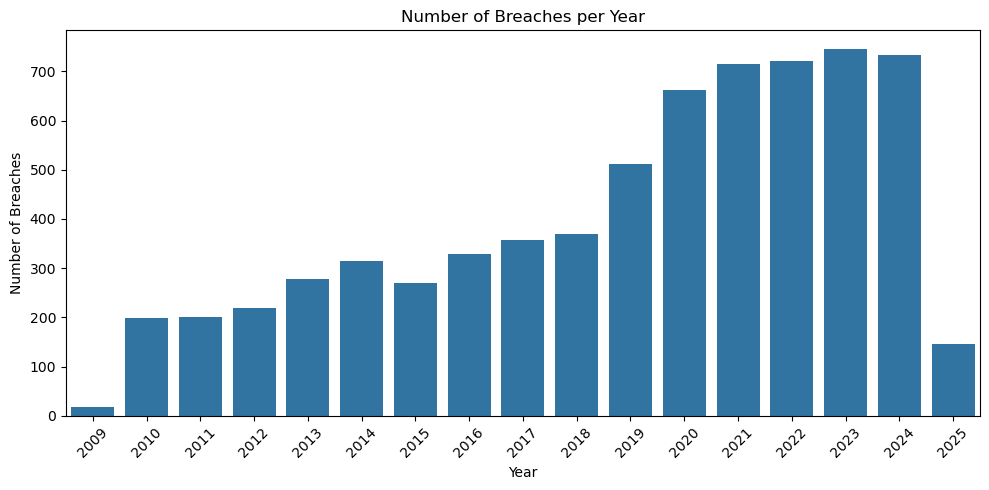

In [60]:
# Number of Breaches per Year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='breach_year')
plt.title('Number of Breaches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

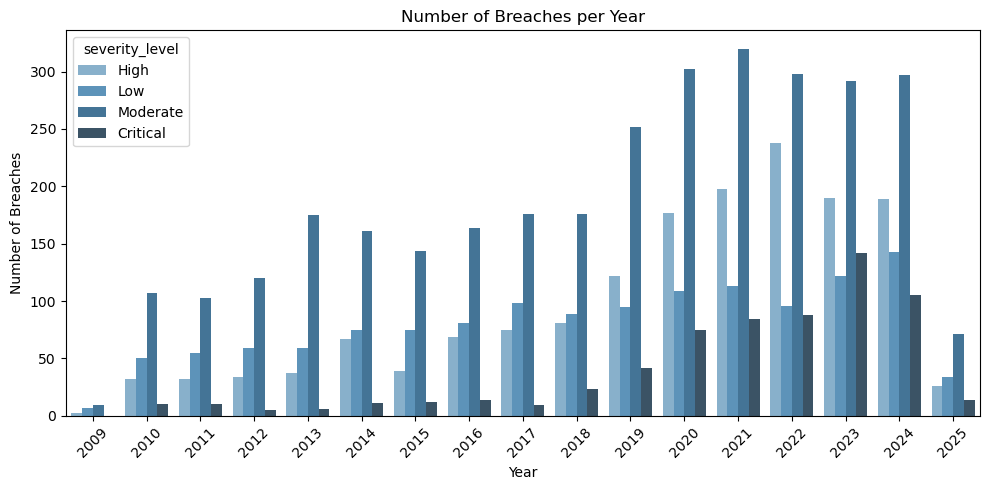

In [62]:
# Number of Breaches with severity per Year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='breach_year', hue='severity_level', palette='Blues_d')
plt.title('Number of Breaches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

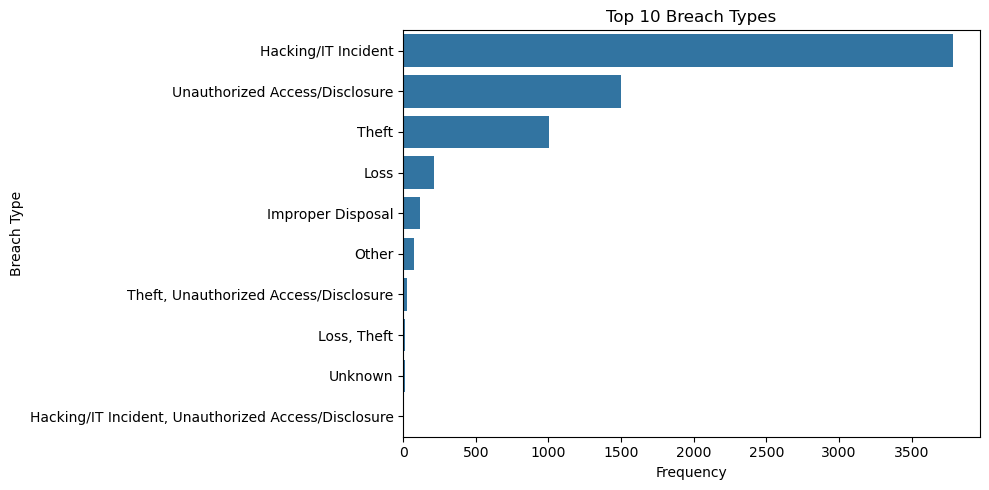

In [63]:
# Top 10 Breach Types
plt.figure(figsize=(10, 5))
top_breaches = df['type_of_breach'].value_counts().head(10)
sns.barplot(y=top_breaches.index, x=top_breaches.values)
plt.title('Top 10 Breach Types')
plt.xlabel('Frequency')
plt.ylabel('Breach Type')
plt.tight_layout()
plt.show()

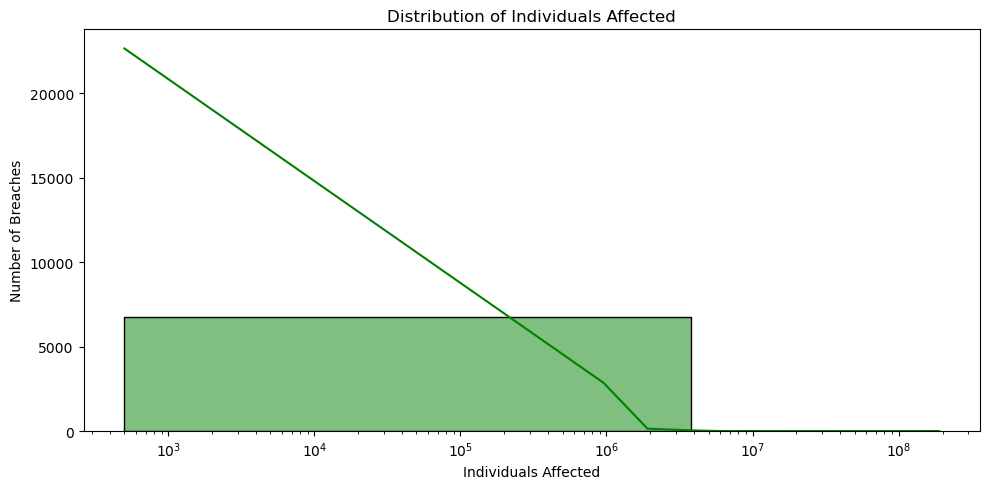

In [66]:
# Distribution of Individuals Affected
plt.figure(figsize=(10, 5))
sns.histplot(df['individuals_affected'], bins=50, kde=True, color='green')
plt.xscale('log')
plt.title('Distribution of Individuals Affected')
plt.xlabel('Individuals Affected')
plt.ylabel('Number of Breaches')
plt.tight_layout()
plt.show()

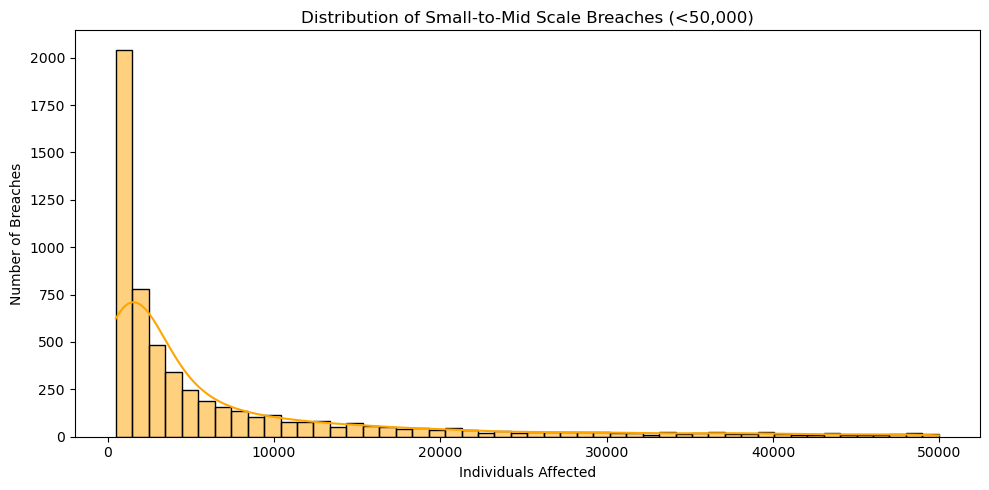

In [82]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['individuals_affected'] < 50000]['individuals_affected'],
             bins=50, kde=True, color='orange')
plt.title('Distribution of Small-to-Mid Scale Breaches (<50,000)')
plt.xlabel('Individuals Affected')
plt.ylabel('Number of Breaches')
plt.tight_layout()
plt.show()


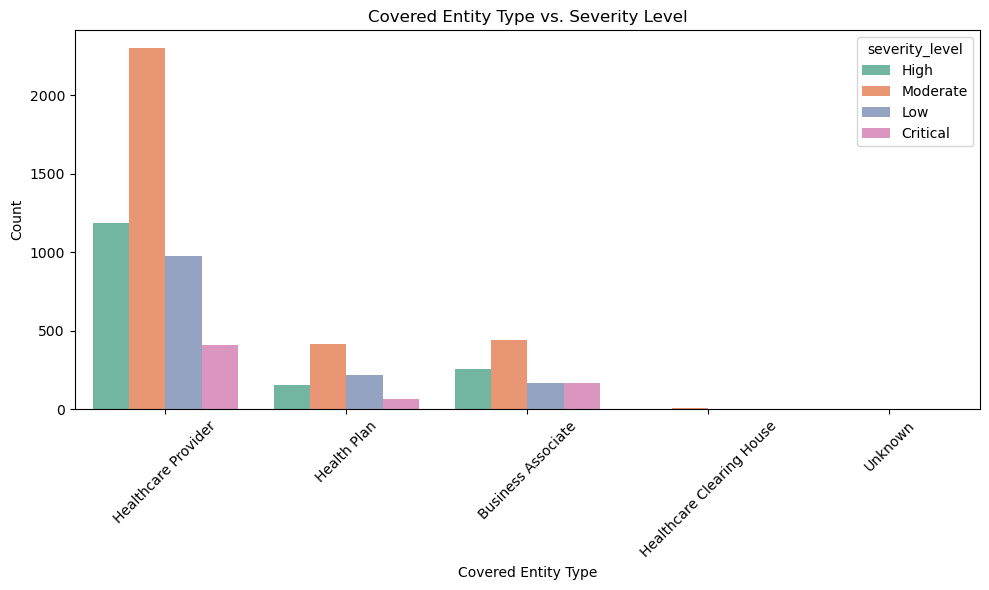

In [92]:
# Covered Entity Type vs Severity Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='covered_entity_type', hue='severity_level', palette='Set2')
plt.title('Covered Entity Type vs. Severity Level')
plt.xlabel('Covered Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\USER\AppData\Local\Temp\ipykernel_28928\2802773375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


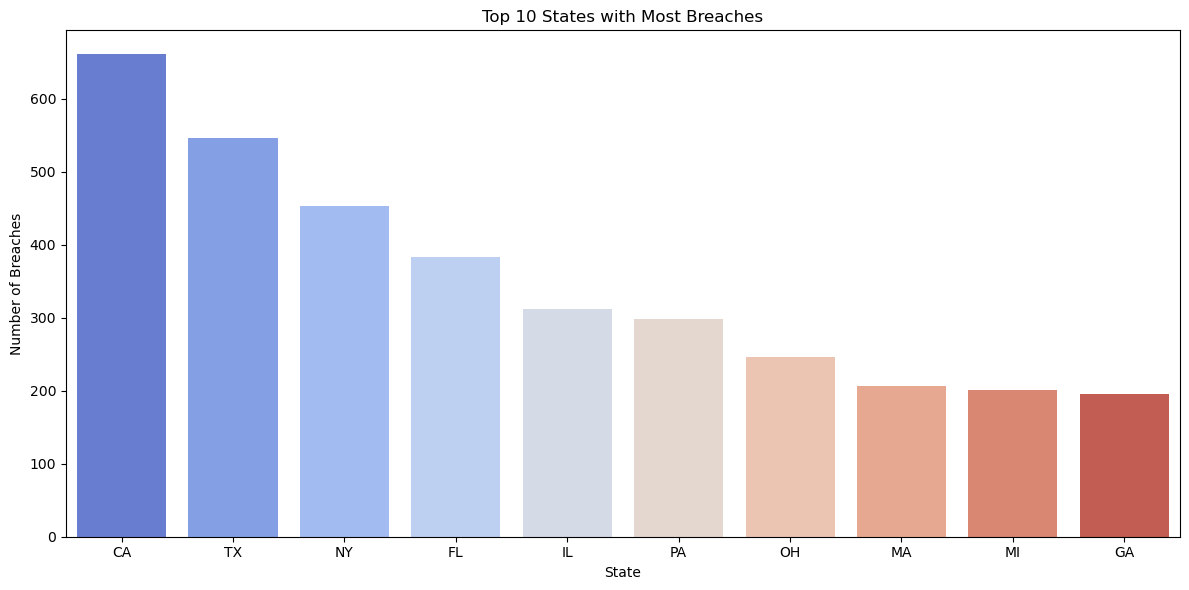

In [88]:
# 2. Breaches by State (Top 10)
plt.figure(figsize=(12, 6))
top_states = df['state'].value_counts().nlargest(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title('Top 10 States with Most Breaches')
plt.xlabel('State')
plt.ylabel('Number of Breaches')
plt.tight_layout()


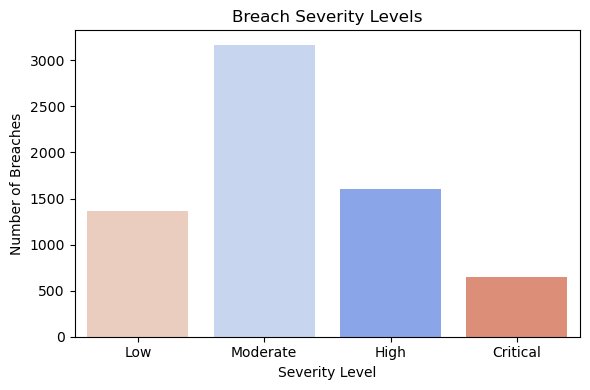

In [80]:
# Severity Level Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='severity_level', hue='severity_level',
              order=['Low', 'Moderate', 'High', 'Critical'],
              palette='coolwarm', legend=False)
plt.title('Breach Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Number of Breaches')  
plt.tight_layout()
plt.show()


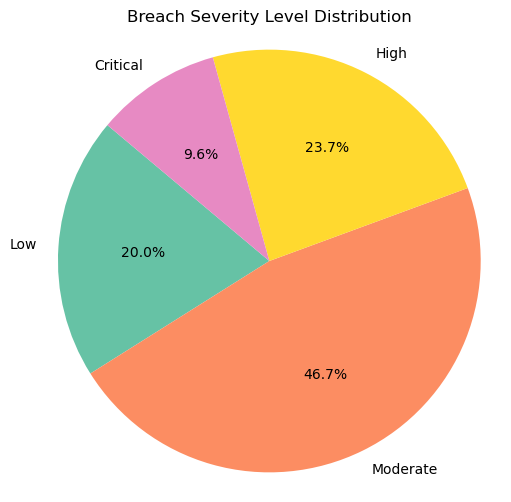

In [76]:
# Calculate value counts for pie chart
severity_counts = df['severity_level'].value_counts().reindex(['Low', 'Moderate', 'High', 'Critical'])

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['#66c2a5', '#fc8d62', '#ffd92f', '#e78ac3'])
plt.title('Breach Severity Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()

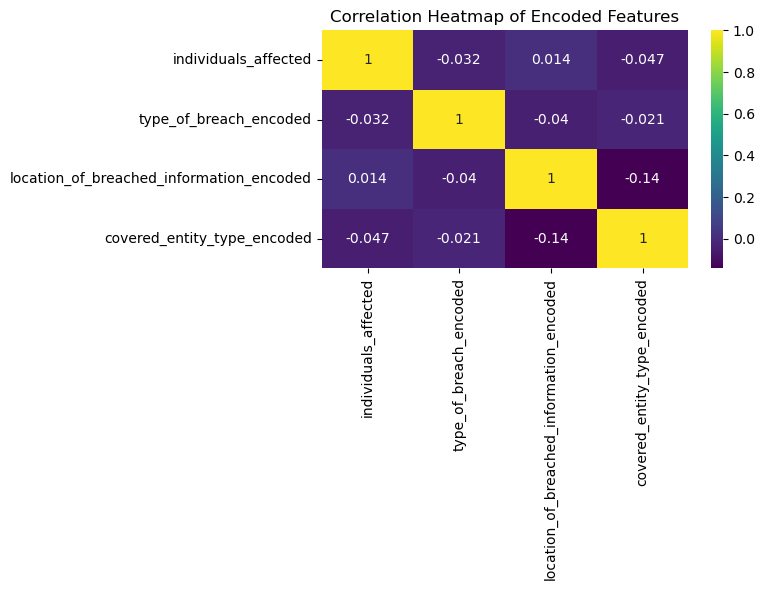

In [84]:
#Correlation Heatmap
plt.figure(figsize=(8, 6))
encoded_features = df[['individuals_affected', 'type_of_breach_encoded',
                       'location_of_breached_information_encoded', 'covered_entity_type_encoded']]
sns.heatmap(encoded_features.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Encoded Features')
plt.tight_layout()
plt.show()
